Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [41]:
import pandas as pd

yelp_df = pd.read_csv("C:/Users/colte/LHL-final-project/data/yelp_df.csv")
foursquare_df = pd.read_csv("C:/Users/colte/LHL-final-project/data/foursquare_df.csv")
stations_df = pd.read_csv("C:/Users/colte/LHL-final-project/data/stations_df.csv")

# Merge Yelp data with stations data
stations_yelp_df = stations_df.merge(
    yelp_df,
    how="left",
    left_on=["latitude", "longitude"],
    right_on=["station_latitude", "station_longitude"]
)

# Drop repetitive columns for station latitude and longitude
stations_yelp_df = stations_yelp_df.drop(
    columns=[
        "station_latitude",
        "station_longitude"
    ]
)

# Create file path for stations_yelp_df_df
stations_yelp_df_file_path = "C:/Users/colte/LHL-final-project/data/stations_yelp_df_df.csv"

# Add stations_yelp_df_df.csv to file path
stations_yelp_df.to_csv(stations_yelp_df_file_path, index=False)

print(f"df was saved to {stations_yelp_df_file_path}")

# Merge Foursquare data with stations_yelp data
all_combined_df = stations_yelp_df.merge(
    foursquare_df,
    how="left",
    left_on=["latitude", "longitude"],
    right_on=["station_latitude", "station_longitude"]
)

# Fill missing fields from Foursquare data
columns_to_fill = ["poi_name", "poi_address", "poi_categories", "poi_latitude", "poi_longitude"]
for col in columns_to_fill:
    all_combined_df[col] = all_combined_df[f"{col}_x"].combine_first(all_combined_df[f"{col}_y"])

# Drop unnecessary columns from Foursquare merge
all_combined_df = all_combined_df.drop(
    columns=[
        "poi_name_x", 
        "poi_address_x", 
        "poi_categories_x", 
        "poi_latitude_x", 
        "poi_longitude_x",
        "poi_name_y", 
        "poi_address_y", 
        "poi_categories_y", 
        "poi_latitude_y", 
        "poi_longitude_y"
    ]
)

# Drop duplicate rows
all_combined_df = all_combined_df.drop_duplicates(
    subset=["poi_name", "poi_address", "poi_latitude", "poi_longitude"]
)

# Drop repetitive columns
all_combined_df = all_combined_df.drop(
    columns = ["station_latitude", "station_longitude"]
)

# Rearrange column order
columns = [
    'city', 'country', 'name', 'latitude', 'longitude', 'slots',
    'poi_name', 'poi_address', 'poi_rating', 'distance_from_station',
    'poi_categories', 'poi_latitude', 'poi_longitude'    
]

# Reorder the DataFrame
all_combined_df = all_combined_df[columns]

# Reset index for all_combined_df
all_combined_df = all_combined_df.reset_index(drop=True)
    
#Print results
print(all_combined_df.head())

# Create file path for all_combined_df
all_combined_file_path = "C:/Users/colte/LHL-final-project/data/all_combined_df.csv"

# Add all_combined_df.csv to file path
all_combined_df.to_csv(all_combined_file_path, index=False)

print(f"df was saved to {all_combined_file_path}")

    city country          name   latitude  longitude  slots  poi_rating  \
0  Turku      FI  Asesepänkatu  60.441012   22.25659      8         0.0   
1  Turku      FI  Asesepänkatu  60.441012   22.25659      8         0.0   
2  Turku      FI  Asesepänkatu  60.441012   22.25659      8         0.0   
3  Turku      FI  Asesepänkatu  60.441012   22.25659      8         0.0   
4  Turku      FI  Asesepänkatu  60.441012   22.25659      8         0.0   

   station_latitude  station_longitude  distance_from_station     poi_name  \
0         60.441012           22.25659                     85  Pub Hopotus   
1         60.441012           22.25659                    230  Pub Hopotus   
2         60.441012           22.25659                    245  Pub Hopotus   
3         60.441012           22.25659                    249  Pub Hopotus   
4         60.441012           22.25659                    264  Pub Hopotus   

               poi_address poi_categories  poi_latitude  poi_longitude  
0  Kuni

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

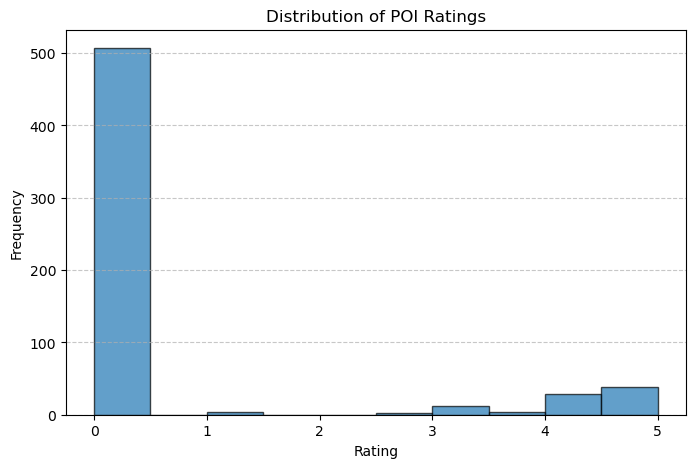

In [69]:
import matplotlib.pyplot as plt

# Combine Yelp and Foursquare ratings into one column for visualization
all_combined_df["poi_rating"] = pd.to_numeric(all_combined_df["poi_rating"], errors="coerce")
ratings = all_combined_df["poi_rating"].dropna()

# Plot the distribution of POI ratings
plt.figure(figsize=(8, 5))
plt.hist(ratings, bins=10, edgecolor="black", alpha=0.7)
plt.title("Distribution of POI Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [85]:
import sqlite3
import os

# Create file path for db
db_path = "C:/Users/colte/LHL-final-project/data/all_combined_data.db"

# Connect to the SQLite database (it will be created if it doesn't exist)
conn = sqlite3.connect(db_path)

# Write the DataFrame to an SQLite table
all_combined_df.to_sql("all_combined_data", conn, if_exists="replace", index=False)

# Close the connection
conn.close()

print(f"Data successfully saved to {db_path}")

Data successfully saved to C:/Users/colte/LHL-final-project/data/all_combined_data.db


Look at the data before and after the join to validate your data.

In [87]:
# Inspect the structure of stations_df
print("Stations DataFrame:")
print(stations_df.head())

# Inspect the structure of yelp_df
print("\nYelp DataFrame:")
print(yelp_df.head())

# Inspect the structure of foursquare_df
print("\nFoursquare DataFrame:")
print(foursquare_df.head())

# Ensure the join keys align correctly
print("\nStations Join Keys:")
print(stations_df[["latitude", "longitude"]].drop_duplicates().head())

print("\nYelp Join Keys:")
print(yelp_df[["station_latitude", "station_longitude"]].drop_duplicates().head())

print("\nFoursquare Join Keys:")
print(foursquare_df[["station_latitude", "station_longitude"]].drop_duplicates().head())

Stations DataFrame:
    city country                       name   latitude  longitude  slots
0  Turku      FI               Asesepänkatu  60.441012  22.256590      8
1  Turku      FI  Runosmäki Signalistinkatu  60.485777  22.268321      8
2  Turku      FI       Sale Kupittaanpuisto  60.448001  22.288602      3
3  Turku      FI          Sairashuoneenkatu  60.448961  22.246354      6
4  Turku      FI     Citymarket Länsikeskus  60.472613  22.233105     10

Yelp DataFrame:
   station_latitude  station_longitude                           poi_name  \
0         60.441012           22.25659                        Pub Hopotus   
1         60.441012           22.25659  Martinmäen kotiruokapalvelu Avoin   
2         60.441012           22.25659              Naantalin Aurinkoinen   
3         60.441012           22.25659                            Melange   
4         60.441012           22.25659                         Maku Turku   

               poi_address poi_categories  poi_rating  poi_lat

In [89]:
# Inspect the resulting DataFrame
print("\nCombined DataFrame After Join:")
print(all_combined_df.head())

# Check for rows with missing POI data
missing_poi = all_combined_df[all_combined_df["poi_name"].isna()]
print(f"\nRows with Missing POI Data: {len(missing_poi)}")
print(missing_poi.head())

# Validate join integrity by checking duplicate rows
duplicates = all_combined_df.duplicated(subset=["latitude", "longitude", "poi_name"])
print(f"\nNumber of Duplicate Rows: {duplicates.sum()}")

# Check for key columns
print("\nCombined DataFrame Columns:")
print(all_combined_df.columns)



Combined DataFrame After Join:
    city country          name   latitude  longitude  slots  \
0  Turku      FI  Asesepänkatu  60.441012   22.25659      8   
1  Turku      FI  Asesepänkatu  60.441012   22.25659      8   
2  Turku      FI  Asesepänkatu  60.441012   22.25659      8   
3  Turku      FI  Asesepänkatu  60.441012   22.25659      8   
4  Turku      FI  Asesepänkatu  60.441012   22.25659      8   

                            poi_name              poi_address  poi_rating  \
0                        Pub Hopotus  Kuninkaankartanonkatu 8         0.0   
1  Martinmäen kotiruokapalvelu Avoin    Tiilentekijänkatu 10J         0.0   
2              Naantalin Aurinkoinen             Martinkatu 3         0.0   
3                            Melange             Martinkatu 3         0.0   
4                         Maku Turku          Stålarminkatu 5         2.5   

   distance_from_station poi_categories  poi_latitude  poi_longitude  
0                     85    Restaurants     60.439449  